# "Anova in Regression Analysis"
> "전북대학교 통계학 입문"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Introduction to Statistics]
- image: images/20211130linear.png

# 회귀분석의 ANOVA

In [16]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
file_url <- "http://www.lock5stat.com/datasets2e/Cereal.csv"

In [3]:
cereal = read.csv(file_url)

In [4]:
fit = lm(Calories ~ Sugars, data=cereal)

In [5]:
summary(fit)


Call:
lm(formula = Calories ~ Sugars, data = cereal)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.574 -25.282  -2.549  17.796  51.805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  88.9204    10.8120   8.224 5.96e-09 ***
Sugars        4.3103     0.9269   4.650 7.22e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26.61 on 28 degrees of freedom
Multiple R-squared:  0.4357,	Adjusted R-squared:  0.4156 
F-statistic: 21.62 on 1 and 28 DF,  p-value: 7.217e-05


In [6]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Sugars,1,15316.51,15316.5131,21.62296,7.217205e-05
Residuals,28,19833.65,708.3448,NA,NA


In [7]:
sum( (cereal$Calories - mean(cereal$Calories))^2)

[1] 35150.17

## Example 5.14

In [8]:
fit1 = lm(Calories ~ Sugars, data=cereal)
summary(fit1)


Call:
lm(formula = Calories ~ Sugars, data = cereal)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.574 -25.282  -2.549  17.796  51.805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  88.9204    10.8120   8.224 5.96e-09 ***
Sugars        4.3103     0.9269   4.650 7.22e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26.61 on 28 degrees of freedom
Multiple R-squared:  0.4357,	Adjusted R-squared:  0.4156 
F-statistic: 21.62 on 1 and 28 DF,  p-value: 7.217e-05


In [21]:
fit2 = lm(Calories ~ Sodium, data=cereal)
as_tibble(anova(fit2))

Df,Sum Sq,Mean Sq,F value,Pr(>F)
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3241.282,3241.282,2.844221,0.1028158
28,31908.884,1139.603,NA,NA


In [22]:
summary(fit2)


Call:
lm(formula = Calories ~ Sodium, data = cereal)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.387 -22.917  -8.006  18.747  76.233 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 103.75873   18.86779   5.499  7.1e-06 ***
Sodium        0.13658    0.08098   1.686    0.103    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.76 on 28 degrees of freedom
Multiple R-squared:  0.09221,	Adjusted R-squared:  0.05979 
F-statistic: 2.844 on 1 and 28 DF,  p-value: 0.1028


In [28]:
33.76/ (sd(cereal$Sodium)*sqrt(29))

[1] 0.08098909

In [27]:
cereal

Name,Company,Serving,Calories,Fat,Sodium,Carbs,Fiber,Sugars,Protein
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
AppleJacks,K,1.00,117,0.6,143,27,0.5,15.0,1.0
Boo Berry,G,1.00,118,0.8,211,27,0.1,14.0,1.0
Cap'n Crunch,Q,0.75,144,2.1,269,31,1.1,16.0,1.3
Cinnamon Toast Crunch,G,0.75,169,4.4,408,32,1.7,13.3,2.7
Cocoa Blasts,Q,1.00,130,1.2,135,29,0.8,16.0,1.0
Cocoa Puffs,G,1.00,117,1.0,171,26,0.8,14.0,1.0
Cookie Crisp,G,1.00,117,0.9,178,26,0.5,13.0,1.0
Corn Flakes,K,1.00,101,0.1,202,24,0.8,3.0,2.0
Corn Pops,K,1.00,117,0.2,120,28,0.3,15.0,1.0


## Problem 5.4

In [29]:
cereal

Name,Company,Serving,Calories,Fat,Sodium,Carbs,Fiber,Sugars,Protein
<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
AppleJacks,K,1.00,117,0.6,143,27,0.5,15.0,1.0
Boo Berry,G,1.00,118,0.8,211,27,0.1,14.0,1.0
Cap'n Crunch,Q,0.75,144,2.1,269,31,1.1,16.0,1.3
Cinnamon Toast Crunch,G,0.75,169,4.4,408,32,1.7,13.3,2.7
Cocoa Blasts,Q,1.00,130,1.2,135,29,0.8,16.0,1.0
Cocoa Puffs,G,1.00,117,1.0,171,26,0.8,14.0,1.0
Cookie Crisp,G,1.00,117,0.9,178,26,0.5,13.0,1.0
Corn Flakes,K,1.00,101,0.1,202,24,0.8,3.0,2.0
Corn Pops,K,1.00,117,0.2,120,28,0.3,15.0,1.0


In [33]:
fit = lm(Calories ~ Fiber, data = cereal)
summary(fit)


Call:
lm(formula = Calories ~ Fiber, data = cereal)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.889 -23.528  -5.832  17.896  71.654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  118.590      8.019  14.788 9.32e-15 ***
Fiber          8.484      3.111   2.727   0.0109 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.49 on 28 degrees of freedom
Multiple R-squared:  0.2098,	Adjusted R-squared:  0.1816 
F-statistic: 7.436 on 1 and 28 DF,  p-value: 0.01091


In [39]:
anova_fit = anova(fit)
anova_fit

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Fiber,1,7376.109,7376.1085,7.436113,0.01090724
Residuals,28,27774.058,991.9306,NA,NA


In [40]:
anova_fit[[2,2]] / 28

[1] 991.9306

In [38]:
anova_fit[[1,3]] / anova_fit[[2,3]]

[1] 7.436113

## Problem 5.5

In [59]:
file_url = "http://www.lock5stat.com/datasets2e/StudentSurvey.csv" 
student = read.csv(file_url)
student %>% select(c(VerbalSAT, GPA))

VerbalSAT,GPA
<int>,<dbl>
540,3.13
520,2.50
550,2.55
490,3.10
720,2.70
600,3.20
640,2.77
660,3.30
550,2.80


In [54]:
fit = lm(GPA ~ VerbalSAT, data = student) 

In [56]:
summary(fit)


Call:
lm(formula = GPA ~ VerbalSAT, data = student)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0936 -0.2422  0.0282  0.2550  0.9253 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.0335506  0.1621397  12.542  < 2e-16 ***
VerbalSAT   0.0018929  0.0002709   6.989 1.45e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3732 on 343 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.1246,	Adjusted R-squared:  0.1221 
F-statistic: 48.84 on 1 and 343 DF,  p-value: 1.454e-11


In [61]:
x = 550
0.0018929*x + 2.0335506

[1] 3.074646

In [62]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
VerbalSAT,1,6.802883,6.8028831,48.84023,1.453626e-11
Residuals,343,47.775956,0.1392885,NA,NA


$R^2 = \dfrac{SSModel}{SSTotal}$

In [67]:
anova(fit)[[1,2]] / (anova(fit)[[1,2]] + anova(fit)[[2,2]])

[1] 0.1246432

## Problem 5.6

In [68]:
file_url = "http://www.lock5stat.com/datasets2e/WaterStriders.csv"
strider = read.csv(file_url)

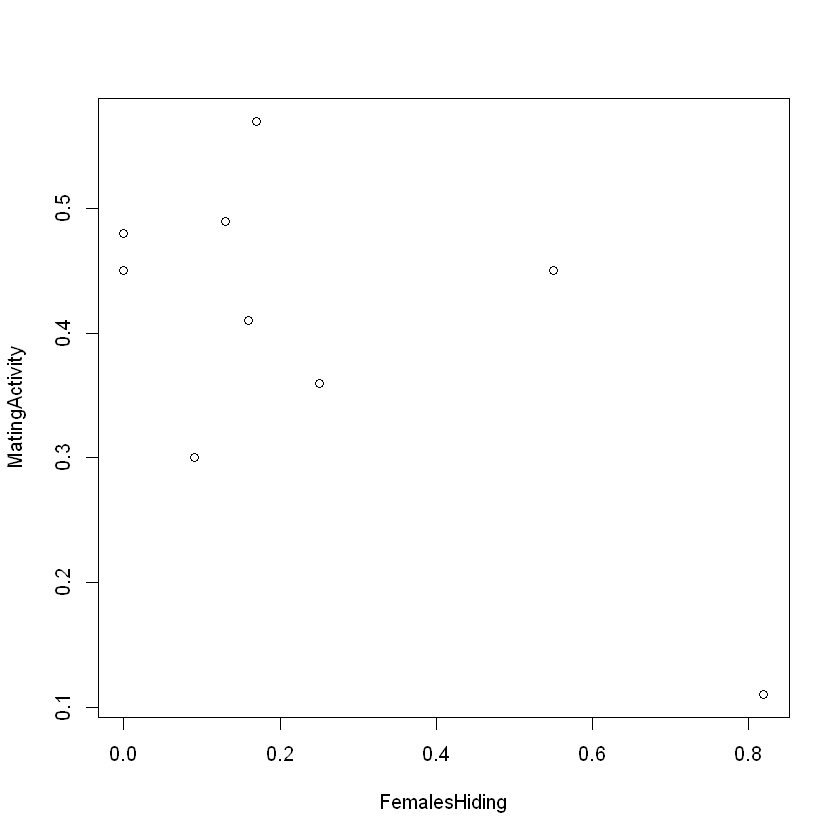

In [72]:
strider %>% select(c(FemalesHiding, MatingActivity)) %>% plot

In [73]:
fit = lm(MatingActivity ~ FemalesHiding, data = strider)

In [75]:
summary(fit)


Call:
lm(formula = MatingActivity ~ FemalesHiding, data = strider)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15105 -0.03703 -0.00928  0.03888  0.14763 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.48014    0.04213  11.398 3.17e-06 ***
FemalesHiding -0.32321    0.12605  -2.564   0.0334 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1013 on 8 degrees of freedom
Multiple R-squared:  0.4511,	Adjusted R-squared:  0.3825 
F-statistic: 6.575 on 1 and 8 DF,  p-value: 0.03343


In [77]:
x = 0.5
-0.32321 * x + 0.48014

[1] 0.318535

In [79]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FemalesHiding,1,0.06748725,0.06748725,6.575082,0.03342822
Residuals,8,0.08211275,0.01026409,NA,NA


In [83]:
0.06748 / (0.06748 + 0.08211)

[1] 0.4510997

# 신뢰구간과 예측구간

## Example 5.17

In [130]:
file_url =  "http://www.lock5stat.com/datasets2e/inkjetPrinters.csv" 

In [131]:
inkjet = read.csv(file_url)

In [132]:
fit = lm(Price ~ PPM, data = inkjet)

In [133]:
summary(fit)


Call:
lm(formula = Price ~ PPM, data = inkjet)

Residuals:
   Min     1Q Median     3Q    Max 
-79.38 -51.40  -3.49  43.85  87.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -94.22      56.40  -1.671 0.112086    
PPM            90.88      19.49   4.663 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58.55 on 18 degrees of freedom
Multiple R-squared:  0.5471,	Adjusted R-squared:  0.522 
F-statistic: 21.75 on 1 and 18 DF,  p-value: 0.0001934


In [134]:
newdata = data.frame(PPM = 3.0)

In [135]:
newdata

PPM
<dbl>
3


In [136]:
predict(fit, newdata, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,178.4124,52.1476,304.6773


In [137]:
predict(fit, newdata, interval = "confidence", level = 0.95)

,fit,lwr,upr
1,178.4124,149.8849,206.94


In [138]:
summary(fit)


Call:
lm(formula = Price ~ PPM, data = inkjet)

Residuals:
   Min     1Q Median     3Q    Max 
-79.38 -51.40  -3.49  43.85  87.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -94.22      56.40  -1.671 0.112086    
PPM            90.88      19.49   4.663 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58.55 on 18 degrees of freedom
Multiple R-squared:  0.5471,	Adjusted R-squared:  0.522 
F-statistic: 21.75 on 1 and 18 DF,  p-value: 0.0001934


## Problem 5.7

In [139]:
base_url = "http://www.lock5stat.com/datasets2e/" 

In [140]:
file = "SampCountries.csv"

In [141]:
url = paste0(base_url, file)

In [142]:
samp = read.csv(url)

In [143]:
fit = lm(LifeExpectancy ~ Health, data = samp)

In [151]:
predict(fit, data.frame(Health = 3), interval = "prediction", level = 0.95)

,fit,lwr,upr
1,63.506,41.7928,85.2192


In [152]:
predict(fit, data.frame(Health = 10), interval = "prediction", level = 0.95)

,fit,lwr,upr
1,68.6062,47.9192,89.29321


In [154]:
predict(fit, data.frame(Health = 50), interval = "prediction", level = 0.95)

,fit,lwr,upr
1,97.75023,63.3292,132.1713


## Problem 5.8

In [163]:
file = "ElectionMargin.csv"
url = paste0(base_url, file)
EM = read.csv(url)

In [168]:
EM

Year,Candidate,Approval,Margin,Result
<int>,<chr>,<int>,<dbl>,<chr>
1940,Roosevelt,62,10.0,Won
1948,Truman,50,4.5,Won
1956,Eisenhower,70,15.4,Won
1964,Johnson,67,22.6,Won
1972,Nixon,57,23.2,Won
1976,Ford,48,-2.1,Lost
1980,Carter,31,-9.7,Lost
1984,Reagan,57,18.2,Won
1992,G.H.W.Bush,39,-5.5,Lost


In [169]:
EM$Approval %>% mean
EM$Approval %>% sd

EM$Margin %>% mean
EM$Margin %>% sd

[1] 52.91667

[1] 11.0409

[1] 7.616667

[1] 10.71726

In [170]:
fit = lm(Margin ~ Approval, data= EM)
summary(fit)


Call:
lm(formula = Margin ~ Approval, data = EM)

Residuals:
   Min     1Q Median     3Q    Max 
-6.543 -2.758 -1.067  1.591 12.159 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.7602     8.3415  -4.407 0.001321 ** 
Approval      0.8386     0.1546   5.425 0.000291 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.661 on 10 degrees of freedom
Multiple R-squared:  0.7464,	Adjusted R-squared:  0.721 
F-statistic: 29.43 on 1 and 10 DF,  p-value: 0.0002909


In [171]:
anova(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Approval,1,943.0398,943.03976,29.43165,0.0002909048
Residuals,10,320.4169,32.04169,NA,NA


In [172]:
predict(fit, data.frame(Approval = 50), interval = "confidence", level = 0.95)

,fit,lwr,upr
1,5.170698,1.393745,8.947651


In [174]:
predict(fit, data.frame(Approval = 50), interval = "prediction", level = 0.95)

,fit,lwr,upr
1,5.170698,-7.995153,18.33655


In [175]:
predict(fit, data.frame(Approval = NA), interval = "confidence", level = 0.95)

ERROR: Error: variable 'Approval' was fitted with type "numeric" but type "logical" was supplied


In [176]:
EM

Year,Candidate,Approval,Margin,Result
<int>,<chr>,<int>,<dbl>,<chr>
1940,Roosevelt,62,10.0,Won
1948,Truman,50,4.5,Won
1956,Eisenhower,70,15.4,Won
1964,Johnson,67,22.6,Won
1972,Nixon,57,23.2,Won
1976,Ford,48,-2.1,Lost
1980,Carter,31,-9.7,Lost
1984,Reagan,57,18.2,Won
1992,G.H.W.Bush,39,-5.5,Lost


In [181]:
7.62 - 2.228*0.1546

[1] 7.275551

In [178]:
7.62 + 2.228*0.1546

[1] 7.964449

In [179]:
mean(c(0.8, 14.4))

[1] 7.6

In [185]:
7.62 - 2.201* (10.72/sqrt(12))

[1] 0.808791